<a href="https://colab.research.google.com/github/Anand1923/DSA_Assignments/blob/main/Case_study_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import collections  as cs
import matplotlib.pyplot as plt
import numpy as np


**Import Dataset**

In [ ]:
data=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Case study 2-StudentsPerformance_056e7b1df6aab888d4b13b23f45079ef.xlsx')
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


**Q1 .Count based on gender**

Here groupby is used to caluclate count for each gender

since there is no heading as count ...renamed lunch to count


In [ ]:
data1=data.groupby(['gender'])['lunch'].count().reset_index()
data1.rename(columns={'lunch':'Count'})


,gender,Count
0,female,518
1,male,482


**Q2.Parental level of education**

Getting count of each values

In [ ]:
c=data['parental level of education']
d=cs.Counter(c)
d.most_common()



[('some college', 226),
 ("associate's degree", 222),
 ('high school', 196),
 ('some high school', 179),
 ("bachelor's degree", 118),
 ("master's degree", 59)]

Creating a new table which represents the count  and can be used to prepare  char

In [ ]:
pie=pd.DataFrame()
pie['Count']=data['parental level of education'].value_counts()
pie['math score']=data.groupby('parental level of education')['math score'].mean()
pie['reading score']=data.groupby('parental level of education')['reading score'].mean()
pie['writing score']=data.groupby('parental level of education')['writing score'].mean()
pie=pie.reset_index()
pie.rename(columns={'index':'Parental level education'},inplace=True)
pie


,Parental level education,Count,math score,reading score,writing score
0,some college,226,67.128319,69.566372,69.035398
1,associate's degree,222,67.977477,71.018018,70.031532
2,high school,196,61.821429,64.602041,62.403061
3,some high school,179,63.134078,66.759777,64.888268
4,bachelor's degree,118,69.288136,73.000000,73.381356
5,master's degree,59,70.254237,75.949153,75.677966


##Data shows Most of the parents have attended college . 

Creating a Pie chart

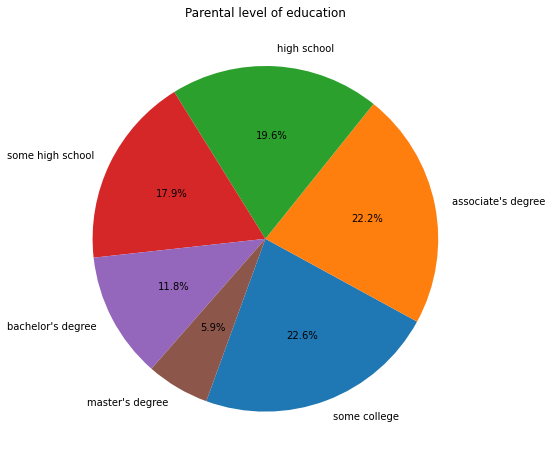

In [ ]:
fig = plt.figure(figsize=[8,6])
#setting axes
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title('Parental level of education')
#plotting pie chart
ax.pie(pie['Count'], labels=pie['Parental level education'],autopct='%0.1f%%',
        startangle = 250
        )
fig.show()

##33.9% of the parents are degree holders

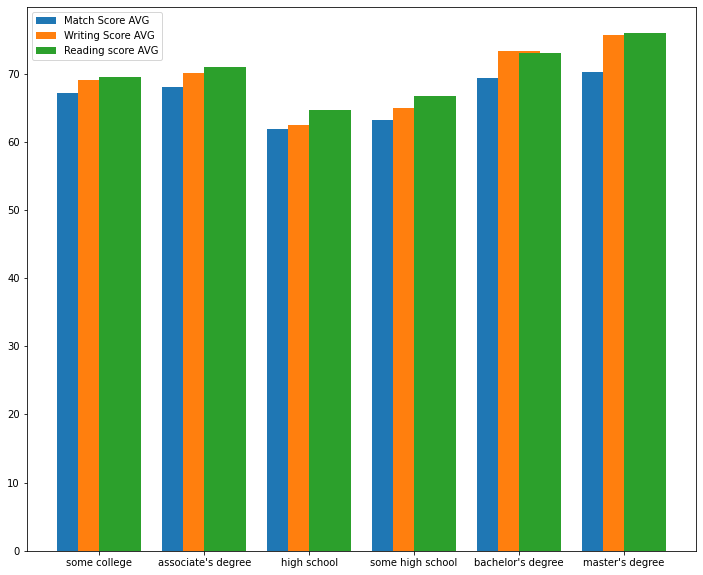

In [ ]:
fig = plt.figure(figsize=[12,10])
x_axis=np.arange(len(pie['Parental level education']))

plt.bar(x_axis-0.2,pie['math score'], width=0.4, label = 'Match Score AVG')
plt.bar(x_axis,pie['writing score'], width=0.4, label = 'Writing Score AVG')
plt.bar(x_axis+0.2,pie['reading score'],width=0.4,label='Reading score AVG')
plt.xticks(x_axis,pie['Parental level education'] )
plt.legend()
fig.show()


##Figure clearly shows that childrens whose parents are educated are scoring better then other comparativly.

**Q3. Who scores most based on gender and test prep**

In [ ]:
gender=data.groupby('gender').mean()[['math score','writing score','reading score']]

test_prep=data.groupby('test preparation course').mean()[['math score','writing score','reading score']]
print(gender)
print(test_prep)


        math score  writing score  reading score
gender                                          
female   63.376448      72.467181      72.590734
male     68.821577      63.446058      65.545643
                         math score  writing score  reading score
test preparation course                                          
completed                  69.96648      74.684358      74.175978
none                       63.78972      64.457944      66.417445


## from above table we could analyze that females are scoring good in reading and writing but lagging bit in math.
## Avg score based on test prep course, clearly shows that students who participated in prep test scored high.

**Q4. What do you think about the scoring variation for math, reading and writing
based on**

In [ ]:
gender1=data.groupby('gender').var()[['math score','writing score','reading score']]
test_prep1=data.groupby('test preparation course').mean()[['math score','writing score','reading score']]

print(gender1)

print(test_prep1)


        math score  writing score  reading score
gender                                          
female  256.958593     220.369327     207.677438
male    211.889097     202.413924     200.211010
                         math score  writing score  reading score
test preparation course                                          
completed                  69.96648      74.684358      74.175978
none                       63.78972      64.457944      66.417445


based on variance for math score .We can see that female students have a huge deviation in their scoring pattern for maths.



**Q5.Give bonus points to the top 25% of
students based on their maths score**




In [ ]:
np.percentile(data['math score'],75)

77.0

In [ ]:
data[data['math score']>77.0]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
430,female,group A,some college,standard,completed,78,87,91
431,female,group B,bachelor's degree,free/reduced,none,78,79,76
432,female,group D,bachelor's degree,standard,none,78,82,79
433,female,group D,high school,standard,none,78,81,80
434,female,group D,bachelor's degree,free/reduced,none,78,90,93
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


We have 231 students who falls under category of scoring more than 75% in maths.